# Recipe Generator using TensorFlow library - RNN based approach

The task for the project is all about building a simple recipe generator using RNN. The dataset utilized is an open-source data from Kaggle that contains approximetly 1099 recipes with its name, ingredients, directions, cooking time, prep time and much more.
However, for this project, we make use of three main features which are ingredients, directions, and recipe name.
User can enter one or more of the previous features as a prompt, and the model
generates the rest of the recipe, or a whole recipe if prompted an ingredient only.


# Reading and Exploring the Dataset
In this section, we start slowly by getting to know the data, understanding its shape and distribution as well as preform some mild pre-processing.
The dataset utilized in this task is a web-extracted dataset.

Import all the necessary libraries.

In [ ]:
# Packages for training the model and working with the dataset.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform


Make sure which python and Tensorflow version we're using (to ensure compatability with Google colab's TPU)

In [ ]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.10.12
Tensorflow version: 2.15.0


Download the dataset, and convert it into a dataframe for pre-processing and visualization purposes.

In [ ]:
df = pd.read_csv('/content/recipes.csv')
df.head()

,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...


Discover the data types of columns within the dataframe, this is helpful to guide through the progress of this project.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1090 non-null   int64  
 1   recipe_name   1090 non-null   object 
 2   prep_time     1039 non-null   object 
 3   cook_time     782 non-null    object 
 4   total_time    1045 non-null   object 
 5   servings      1090 non-null   int64  
 6   yield         879 non-null    object 
 7   ingredients   1090 non-null   object 
 8   directions    1090 non-null   object 
 9   rating        1090 non-null   float64
 10  url           1090 non-null   object 
 11  cuisine_path  1090 non-null   object 
 12  nutrition     1090 non-null   object 
 13  timing        1090 non-null   object 
 14  img_src       1090 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 127.9+ KB


Counting the total size of the dataset (number of records or examples)

In [ ]:
# Count the number of examples (rows) in the dataset
num_examples = len(df)
print("Number of examples in the dataset:", num_examples)


Number of examples in the dataset: 1090


In [ ]:
# Specifying columns that we need
columns_to_describe = ['recipe_name', 'ingredients', 'directions']
df[columns_to_describe].describe(include=[object])


,recipe_name,ingredients,directions
count,1090,1090,1090
unique,961,961,961
top,Apple-Cranberry Crisp,"2 pounds Granny Smith apples - peeled, cored a...",Preheat the oven to 375 degrees F (190 degrees...
freq,5,5,5


Visualizing if any of the columns to be used contain null values. As well as checking the most frequent recipe and the number of unique recipes within the dataset.

Drop any records that do not contain any data within recipe name, ingredients and directions column.
This is essential as those will be the three primary columns within the dataset to be manipulated and what recipe generation will be based on.

In [ ]:
# Function for filtering out records with no recipe name, ingredients nor instructions
df=df.dropna(subset=['recipe_name','ingredients', 'directions'])
# Print the size of the dataset before and after validation
print('Dataset size BEFORE validation:', len(df))
print('Dataset size AFTER deleting empty cells:', len(df))


Dataset size BEFORE validation: 1090
Dataset size AFTER deleting empty cells: 1090


Luckily, the dataset does not contain any empty values within these three columns retaining its original length.

Identifying the most common recipe names within the dataset.

In [ ]:
df['recipe_name'].value_counts().head(10)

,count
recipe_name,
Apple-Cranberry Crisp,5
"Awesome Sausage, Apple and Cranberry Stuffing",5
Old-Fashioned Apple Dumplings,4
Waldorf Salad,4
Delicious Cinnamon Baked Apples,4
Apple Strudel Muffins,4
Easy Apple Crisp with Pie Filling,4
Mom's Apple Fritters,4
Debbie's Amazing Apple Bread,4


As it is shown, Apple-Cranberry Crisp and Awesome Sausage, Apple and Cranberry Stuffing	are the two most common recipes.



---



Furthermore, we visualize the three most common ingredients within our dataset

In [ ]:
from itertools import chain
all_ingredients = list(chain(*df['ingredients'].str.split(',')))

In [ ]:
from collections import Counter

# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Get the most common ingredients
most_common = ingredient_counts.most_common(3)  # Top 3 most common ingredients

print(most_common)

[(' ½ teaspoon salt', 115), (' 1 cup white sugar', 114), (' 1 teaspoon vanilla extract', 111)]


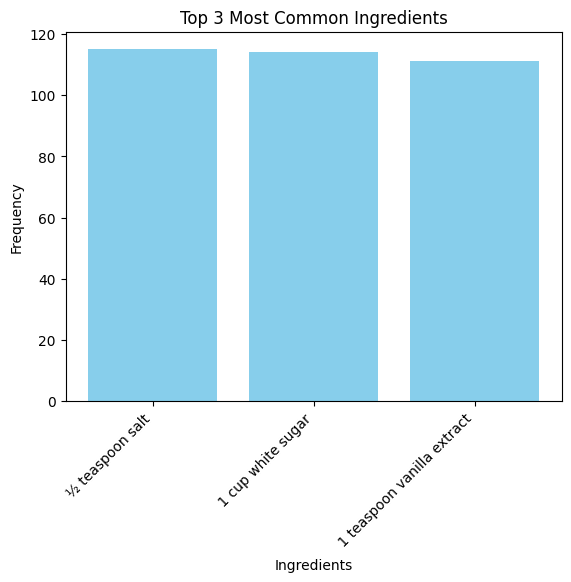

In [ ]:
import matplotlib.pyplot as plt

# Extract ingredients and counts for the top 3
ingredients, counts = zip(*ingredient_counts.most_common(3))

# Plot a bar chart
plt.bar(ingredients, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 3 Most Common Ingredients')
plt.show()

Next, we apply some mild pre-processing as the dataset itself is very clean and well structured. The processing includes replacing measurement symbols such as ½ , ¾, ¼ to be 1/2, 1/4, 3/4 as they might confused the model during generation task.
Furthetly we converted the dataframe into string types for further processing before moving to the model.

In [ ]:
# Dictionary of replacements
replacements = {
    "½": "1/2",
    "¾": "3/4",
    "¼": "1/4"
}

# Function to replace special characters
def replace_special_chars(text):
    for old, new in replacements.items():
        text = text.replace(old, new)
    return text
df['ingredients']= df['ingredients'].apply(replace_special_chars)
df['recipe_name']= df['recipe_name'].apply(replace_special_chars)
df['directions']= df['directions'].apply(replace_special_chars)

# Convert columns to string type
df['recipe_name'] = df['recipe_name'].astype(str)
df['ingredients'] = df['ingredients'].astype(str)
df['directions'] = df['directions'].astype(str)



Here, we defined a specific format for the recipe to be generated. This format will also apply to the previous strings we just converted.

In [ ]:
# Define a function to format the recipe
def format_recipe(row, index):
    formatted = (
        f"Recipe #{index + 1}\n"
        f"---------\n"
        f"📗 {row['recipe_name']}\n"
        f"🥕\n"
        f"{row['ingredients']}\n"
        f"📝\n"
        f"{row['directions']}\n"
    )
    return formatted

# Iterate through the DataFrame and format each recipe
formatted_recipes = []
for index, row in df.iterrows():
    formatted_recipes.append(format_recipe(row, index))



Visualizing the first 10 recipes to ensure the format is consistent and outputs as desired.

In [ ]:
# Print the first 10 recipes from the formatted_recipes list
for recipe_index, recipe_string in enumerate(formatted_recipes[:10]):
    print(recipe_string)  # Prints the stringified recipe content
    print('\n')  # Adds an extra blank line between recipes



Recipe #1
---------
📗 Apple-Cranberry Crostada
🥕
3 tablespoons butter, 2 pounds Granny Smith apples (or other firm, crisp apples), peeled, quartered, cored and sliced 1/4-inch thick, 1 pound Macintosh apples (or other soft-textured apples that fall apart when cooked), peeled, quartered, cored, and sliced 1/4-inch thick, 1/2 cup sugar, 1/2 cup dried cranberries, 1 sheet frozen puff pastry, thawed but still cold (follow package directions), 1  egg white, lightly beaten, 1 tablespoon sugar, 1 cup Optional: Ice cream or lightly sweetened whipped cream
📝
Heat butter in a large skillet over medium-high heat. Add apples, 1/2 cup sugar and cranberries; cover and cook until apples release their liquid, about 5 minutes. Remove lid and continue to cook, stirring frequently, until soft apples fall apart and juices thicken to a thin-syrup consistency, about 5 minutes longer. Pour onto a large-lipped cookie sheet or jellyroll pan and cool to room temperature. (Can be refrigerated in an airtight cont

Now, we visualize the character length within all recipes of the dataset, this is helpful as it will decide what will be the maximum lenght of characters for the generated recipes.
It is best to keep the length as small as possible for a speedier training process.

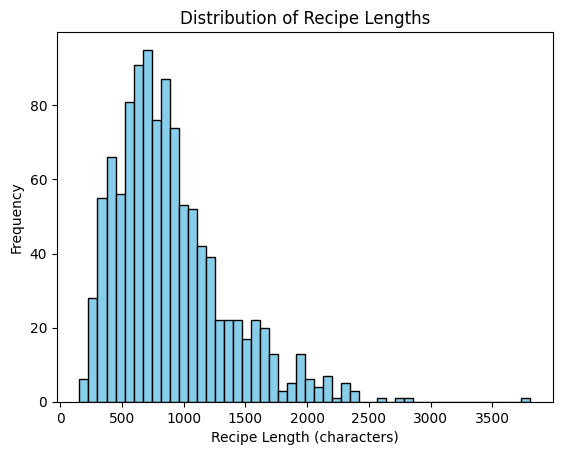

In [ ]:
import matplotlib.pyplot as plt

# Calculate the lengths of the recipes in formatted_recipes
recipes_lengths = [len(recipe_text) for recipe_text in formatted_recipes]

# Plot the histogram of recipe lengths
plt.hist(recipes_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Recipe Lengths')
plt.xlabel('Recipe Length (characters)')
plt.ylabel('Frequency')
plt.show()


It seems like there a clustering around lengths between 500 to 1500

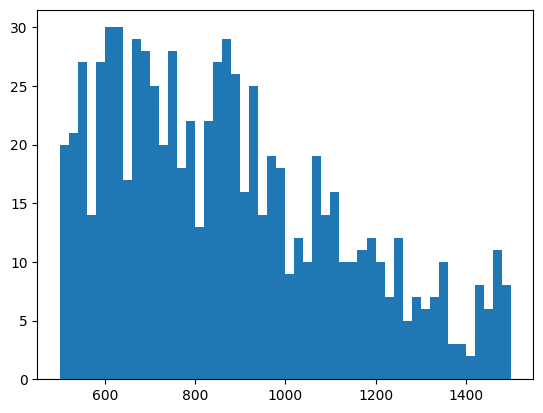

In [ ]:
plt.hist(recipes_lengths, range=(500, 1500), bins=50)
plt.show()

Zooming in the graph a bit more, we can see that the data mostly conists of 400-800 characters. However, since we have a small dataset and we want the model to prevent overfitting, we deicded to set the maximum length to 1200. As it seems to be a reasonable point.

In [ ]:
MAX_RECIPE_LENGTH = 1200

Here we filtered any recipe that consists of more than 1200 characters to unify the maximum length for all recipes.

In [ ]:
def filter_recipes_by_length(recipe_test):
    return len(recipe_test) <= MAX_RECIPE_LENGTH
dataset_filtered = [recipe_text for recipe_text in formatted_recipes if filter_recipes_by_length(recipe_text)]
print('Dataset size BEFORE filtering: ', len(formatted_recipes))
print('Dataset size AFTER filtering: ', len(dataset_filtered))
print('Number of eliminated recipes: ', len(formatted_recipes) - len(dataset_filtered))

Dataset size BEFORE filtering:  1090
Dataset size AFTER filtering:  876
Number of eliminated recipes:  214


Furtherly, we examine how many data records left that satisfy the criteria.

In [ ]:
TOTAL_RECIPES_NUM = len(dataset_filtered)
print('MAX_RECIPE_LENGTH: ', MAX_RECIPE_LENGTH)
print('TOTAL_RECIPES_NUM: ', TOTAL_RECIPES_NUM)

MAX_RECIPE_LENGTH:  1200
TOTAL_RECIPES_NUM:  876


# Vocabulary Creation
As recurrent neural networks (RNN) do not comprehend textual data, the recipes dataset must be converted into some sort of numerical format.
As we will be using a character-based LSTM (Long Short Term Memory) to create unique numbers or indices per character, so the model will predict the next character instead of the next word.

In the following code segment, we will define a stop sign variable that signifies a recipe ended once the recipe has generated to distinguish between recipes.
Furthermore, it is important to preserve the case sensitivity for this task. As

*   The dataset capatalizes recipe names such as: Homemade Apple Cider.
*   Maintaing case sensitivty helps distinguish between the recipe name and "homemade apple cider" the ingredient.



In [ ]:
STOP_SIGN = '␣'
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True,
    filters='',
    lower=False,
    split=''
)
# Stop word is not a part of recipes, but tokenizer must know about it as well.
tokenizer.fit_on_texts([STOP_SIGN])
tokenizer.fit_on_texts(dataset_filtered)
tokenizer.get_config()

{'num_words': None,
 'filters': '',
 'lower': False,
 'split': '',
 'char_level': True,
 'oov_token': None,
 'document_count': 877,
 'word_counts': '{"\\u2423": 1, "R": 1321, "e": 57097, "c": 18534, "i": 29967, "p": 19009, " ": 100283, "#": 876, "3": 1628, "\\n": 10480, "-": 9113, "\\ud83d\\udcd7": 876, "S": 1433, "a": 36831, "r": 29149, "h": 14061, "\'": 147, "s": 26369, "H": 167, "o": 34132, "m": 10769, "d": 17711, "A": 665, "l": 21992, "u": 18117, "\\ud83e\\udd55": 876, "4": 1741, ",": 12878, "n": 33037, "/": 2391, "w": 5921, "t": 33349, "1": 6516, "g": 11079, "2": 3571, "\\ud83d\\udcdd": 876, "C": 1670, "b": 8624, ";": 689, "v": 4315, "k": 4910, "f": 5624, "5": 1537, "0": 1472, ".": 6059, "x": 1783, "y": 2954, "P": 1469, "q": 279, "F": 792, "(": 1032, "7": 604, ")": 1031, "9": 554, "M": 657, "B": 1034, "D": 325, "8": 528, "j": 985, "T": 332, "6": 537, "L": 292, "z": 533, "E": 113, "O": 177, "\\u2153": 134, "G": 337, "I": 300, "\\u00e9": 17, "J": 61, "\\u215b": 48, ":": 68, "K": 49,

We observe the resulting the vocabulary size post-tokenization.

In [ ]:
#Add 1 to get the full size of the vocab. Index 0 is reserved.
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  91


Observe which tokens map to which indecies and vise-versa.

In [ ]:
print(tokenizer.index_word[5])
print(tokenizer.index_word[20])

t
-


In [ ]:
tokenizer.word_index['r']

8

Furtherly, we observe what kind of tokens will the model be trained upon.
As it will try to assmeble in a certain sequence to generate recipes.

In [ ]:
array_vocabulary = tokenizer.sequences_to_texts([[word_index] for word_index in range(VOCABULARY_SIZE)])
print([char for char in array_vocabulary])

['', ' ', 'e', 'a', 'o', 't', 'n', 'i', 'r', 's', 'l', 'p', 'c', 'u', 'd', 'h', ',', 'g', 'm', '\n', '-', 'b', '1', '.', 'w', 'f', 'k', 'v', '2', 'y', '/', 'x', '4', 'C', '3', '5', '0', 'P', 'S', 'R', 'B', '(', ')', 'j', '#', '📗', '🥕', '📝', 'F', ';', 'A', 'M', '7', '9', '6', 'z', '8', 'G', 'T', 'D', 'I', 'L', 'q', 'W', 'O', 'H', "'", '⅓', 'E', ':', 'J', '®', 'K', '⅛', 'U', '⅔', 'N', 'V', 'é', 'Q', 'Y', '!', '"', 'Z', '%', 'ñ', '␣', 'ç', '⅝', '⅞', '_']


Obeserving how the tokenizer converts text into indecies.

In [ ]:
tokenizer.texts_to_sequences(['apple'])

[[3, 11, 11, 10, 2]]

Now, we will form the input for RNN. As mentioned earlier, RNN only deals with numerical input, which is why we'll convert the dataset's textual tokens into their respective indecies.

In [ ]:
dataset_vectorized = tokenizer.texts_to_sequences(dataset_filtered)
print('Vectorized dataset size', len(dataset_vectorized))

Vectorized dataset size 876


The beginning of the very first recipe, post-vectorization.
As we can see, it has been converted into a vector of indecies, each of which corresponding to their (character) token.

In [ ]:
print(dataset_vectorized[0][:10], '...')

[39, 2, 12, 7, 11, 2, 1, 44, 34, 19] ...


Obsereve how the sequence of tokens back to strings, to see how the model outputs the recipes after dealing with them in a numerical format.

In [ ]:
def recipe_sequence_to_string(recipe_sequence):
    # Convert the tokenized sequence back to text (with spaces between characters)
    recipe_stringified = tokenizer.sequences_to_texts([recipe_sequence])[0]

    # Remove spaces between characters but preserve the original structure
    # Using regular expressions to replace multiple spaces between characters with a single space
    import re
    recipe_stringified = re.sub(r'(?<=\S) (?=\S)', '', recipe_stringified)

    print(recipe_stringified)

recipe_sequence_to_string(dataset_vectorized[0])


Recipe   #3 
 --------- 
 📗   Sarah's   Homemade   Applesauce 
 🥕 
 4     apples   -   peeled,   cored   and   chopped,   3/4   cup   water,   1/4   cup   white   sugar,   1/2   teaspoon   ground   cinnamon 
 📝 
 Combine   apples,   water,   sugar,   and   cinnamon   in   a   saucepan;   cover   and   cook   over   medium   heat   until   apples   are   soft,   about   15   to   20   minutes. 
 Allow   apple   mixture   to   cool,   then   mash   with   a   fork   or   potato   masher   until   it   is   the   consistency   you   like. 
 
 
 
 
 
 
 
 
 
 
 
 Photo   by   cookin'mama. 
 cookin   mama 
 



# Padding
In this section of the notebook, we aim to pad the recipes so they'll have a unifrom length when training the model. The padding will be using the earlier defined stop sign in the Vocabulary Creation section.
Simply, we'll start by observing the various recipe lengths within our dataset and pad them using our stop sign to observe changes.
Padding helps our model learn the end of each recipe. Therefore, once it generates new recipes it will place the stop sign at the end to signify ending.

In [ ]:
for recipe_index, recipe in enumerate(dataset_vectorized[:10]):
    print('Recipe #{} length: {}'.format(recipe_index + 1, len(recipe)))

Recipe #1 length: 447
Recipe #2 length: 884
Recipe #3 length: 827
Recipe #4 length: 752
Recipe #5 length: 494
Recipe #6 length: 709
Recipe #7 length: 346
Recipe #8 length: 672
Recipe #9 length: 865
Recipe #10 length: 617


In [ ]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=MAX_RECIPE_LENGTH-1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=MAX_RECIPE_LENGTH+1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
for recipe_index, recipe in enumerate(dataset_vectorized_padded[:10]):
    print('Recipe #{} length: {}'.format(recipe_index, len(recipe)))

Recipe #0 length: 1201
Recipe #1 length: 1201
Recipe #2 length: 1201
Recipe #3 length: 1201
Recipe #4 length: 1201
Recipe #5 length: 1201
Recipe #6 length: 1201
Recipe #7 length: 1201
Recipe #8 length: 1201
Recipe #9 length: 1201


In here we obsereve that recipes must all include a stop sign at the end. Which explains why they're one more than the specified maximum character length.

Observing how recipe converts back from vector to text. Notice the padding at the very end.

In [ ]:
recipe_sequence_to_string(dataset_vectorized_padded[0])

Recipe   #3 
 --------- 
 📗   Sarah's   Homemade   Applesauce 
 🥕 
 4     apples   -   peeled,   cored   and   chopped,   3/4   cup   water,   1/4   cup   white   sugar,   1/2   teaspoon   ground   cinnamon 
 📝 
 Combine   apples,   water,   sugar,   and   cinnamon   in   a   saucepan;   cover   and   cook   over   medium   heat   until   apples   are   soft,   about   15   to   20   minutes. 
 Allow   apple   mixture   to   cool,   then   mash   with   a   fork   or   potato   masher   until   it   is   the   consistency   you   like. 
 
 
 
 
 
 
 
 
 
 
 
 Photo   by   cookin'mama. 
 cookin   mama 
 
 ␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣

Converting the dataset into a TensorFlow dataset enables us to use a multitude of helpful functions for further processing of the data.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)
print(dataset)

<_TensorSliceDataset element_spec=TensorSpec(shape=(1201,), dtype=tf.int32, name=None)>


Checking what recipe looks like after converting it to a TensorFlow dataset.

In [ ]:
for recipe in dataset.take(1):
    print('Raw recipe:\n', recipe.numpy(), '\n\n\n')
    print('Stringified recipe:\n')
    recipe_sequence_to_string(recipe.numpy())

Raw recipe:
 [39  2 12 ... 86 86 86] 



Stringified recipe:

Recipe   #3 
 --------- 
 📗   Sarah's   Homemade   Applesauce 
 🥕 
 4     apples   -   peeled,   cored   and   chopped,   3/4   cup   water,   1/4   cup   white   sugar,   1/2   teaspoon   ground   cinnamon 
 📝 
 Combine   apples,   water,   sugar,   and   cinnamon   in   a   saucepan;   cover   and   cook   over   medium   heat   until   apples   are   soft,   about   15   to   20   minutes. 
 Allow   apple   mixture   to   cool,   then   mash   with   a   fork   or   potato   masher   until   it   is   the   consistency   you   like. 
 
 
 
 
 
 
 
 
 
 
 
 Photo   by   cookin'mama. 
 cookin   mama 
 
 ␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣

The following block splits recipe (a single sequence) into an input and a target sequence.
In which, the input sequence takes every token except the last one. Conversely, the traget sequence takes everything but the first token.
This is vital as it prepares data for a sequence-to-sequence task. Whereas the input is the context, and target is what the model trains to predict.

In [ ]:
def split_input_target(recipe):
    input_text = recipe[:-1]
    target_text = recipe[1:]

    return input_text, target_text
dataset_targeted = dataset.map(split_input_target)
print(dataset_targeted)

<_MapDataset element_spec=(TensorSpec(shape=(1200,), dtype=tf.int32, name=None), TensorSpec(shape=(1200,), dtype=tf.int32, name=None))>


Now, each recipe in the dataset consists of two tuples, namely input and target.

In [ ]:
for input_example, target_example in dataset_targeted.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()

    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]

    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified)))


Input sequence size: 1200
Target sequence size: 1200

Input:   "R e c i p e   # 3 \n - - - - - - - - - \n 📗   S a r a h ' s   H o m e m a d e   A p p l e s a u c e \n"
Target:  "e c i p e   # 3 \n - - - - - - - - - \n 📗   S a r a h ' s   H o m e m a d e   A p p l e s a u c e \n 🥕"


Each index of the recipe vectors is processed a single step. As it take the previous index as context to predict the next index. More specifically, RNN considers the current and the previous index as context.
This process will be illustrated below.

In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
    print('Step {:2d}'.format(i + 1))
    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

Step  1
  input: 39 ('R')
  expected output: 2 ('e')
Step  2
  input: 2 ('e')
  expected output: 12 ('c')
Step  3
  input: 12 ('c')
  expected output: 7 ('i')
Step  4
  input: 7 ('i')
  expected output: 11 ('p')
Step  5
  input: 11 ('p')
  expected output: 2 ('e')
Step  6
  input: 2 ('e')
  expected output: 1 (' ')
Step  7
  input: 1 (' ')
  expected output: 44 ('#')
Step  8
  input: 44 ('#')
  expected output: 34 ('3')
Step  9
  input: 34 ('3')
  expected output: 19 ('\n')
Step 10
  input: 19 ('\n')
  expected output: 20 ('-')




---



Currently, each recipe consists of two tuples: input and target each of length 1200.

In [ ]:
print(dataset_targeted)

<_MapDataset element_spec=(TensorSpec(shape=(1200,), dtype=tf.int32, name=None), TensorSpec(shape=(1200,), dtype=tf.int32, name=None))>


In [ ]:
print('TOTAL_RECIPES_NUM: ', TOTAL_RECIPES_NUM)
print('MAX_RECIPE_LENGTH: ', MAX_RECIPE_LENGTH)
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

TOTAL_RECIPES_NUM:  876
MAX_RECIPE_LENGTH:  1200
VOCABULARY_SIZE:  91




---



# Building the model

First, prepare the dataset to be split into batches, instead of processing the full dataset all at once, which can overwhelm the memory and cause problems.

In [ ]:
# Batch size.
BATCH_SIZE = 64
# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000

dataset_train = dataset_targeted \
    .shuffle(SHUFFLE_BUFFER_SIZE) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .repeat()

print(dataset_train)


<_RepeatDataset element_spec=(TensorSpec(shape=(64, 1200), dtype=tf.int32, name=None), TensorSpec(shape=(64, 1200), dtype=tf.int32, name=None))>


Our dataset now is split of batches of 64, each consisting of two tuples with of length 1200.

In [ ]:
for input_text, target_text in dataset_train.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[39  2 12 ... 86 86 86]
 [39  2 12 ... 86 86 86]
 [39  2 12 ... 86 86 86]
 ...
 [39  2 12 ... 86 86 86]
 [39  2 12 ... 86 86 86]
 [39  2 12 ... 86 86 86]], shape=(64, 1200), dtype=int32)

1st batch: target_text: tf.Tensor(
[[ 2 12  7 ... 86 86 86]
 [ 2 12  7 ... 86 86 86]
 [ 2 12  7 ... 86 86 86]
 ...
 [ 2 12  7 ... 86 86 86]
 [ 2 12  7 ... 86 86 86]
 [ 2 12  7 ... 86 86 86]], shape=(64, 1200), dtype=int32)


For each character the model looks up the embedding, runs the LSTM one time-step with the embedding as input, and applies the dense layer to generate logits predicting the log-likelihood of the next character.
In terms of model building, three layers were implemented.
* Input Layer, which maps the indecies to embedding vectors of fixed size.
* LSTM layer (hidden layer): performs computations of the RNN.
* Output layer: displays the output using the vocabulary size.

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))
    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True,
        recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))
    model.add(tf.keras.layers.Dense(vocab_size))

    return model
model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           23296     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 91)            93275     
                                                                 
Total params: 5363547 (20.46 MB)
Trainable params: 5363547 (20.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This is to ensure that the output of the training data follows from the expected output.

In [ ]:
for input_example_batch, target_example_batch in dataset_train.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 1200, 91) # (batch_size, sequence_length, vocab_size)


Which indicates that the model predicts a probability distribution over 91 vocabulary tokens for each of the 1200 timesteps in each of the 64 sequences.

Using the vocabulary, the model tries to output the probability for each token to be assigned as the first token in the first sequence.

In [ ]:
print('Prediction for the 1st letter of the batch 1st sequence:')
print(example_batch_predictions[0, 0])


Prediction for the 1st letter of the batch 1st sequence:
tf.Tensor(
[-1.52887474e-03  4.48448677e-03  3.97046842e-03 -7.03586906e-04
 -4.79794946e-03 -4.92404448e-04 -3.83847393e-03 -6.90438785e-03
  2.93021067e-03  1.96819892e-05 -2.18736962e-03  5.82081731e-03
 -1.75850221e-03  4.34286194e-04 -3.22650024e-03  2.09605205e-03
  7.35197449e-04  4.27089725e-03 -1.90247502e-03  1.46167818e-03
 -4.53994796e-03 -2.62012240e-04  2.62717297e-03  6.68728375e-04
  2.66590621e-03 -3.35361948e-03 -2.25357106e-03 -5.40147419e-04
 -5.66709787e-03 -2.21676892e-03 -9.66479303e-04 -1.51318149e-04
 -3.72541230e-03 -8.45627161e-04  7.39146816e-03 -7.44696881e-04
  5.88968862e-03  5.92396536e-04  4.74465173e-03 -3.77798337e-04
  2.86497921e-03  3.08086304e-03 -3.88063258e-03 -1.18779484e-04
  2.49451655e-03 -1.50621659e-03  1.05085201e-04  5.98109746e-03
 -5.02314558e-03 -4.53095790e-03  1.60612620e-03 -2.37716333e-04
 -6.62038568e-04 -1.78074953e-03 -3.56168393e-03 -2.61212059e-04
 -1.30016007e-03  1.10

For each input character the example_batch_predictions array contains a vector of probabilities of what the next character might be. If probability at position 10 in that vector is, lets say, 0.1 and the probability at position 5 is 4.1 it means that we should better pick the character with the index 5 as next following character.



---



Choosing the highest prediction over and over again will result in generating the same recipe over and over again which might get suck in a loop.
Therefore, in order to get the network to predict different recipes for each input (including the same input twice), We draw samples from different predictions. Using tf.random.categorical() function, it will integrate some fuzziness to the network.

In [ ]:
# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0"
# (element with index 0) is low but the probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];
# Let's generate 5 samples. Each sample is a class index. Class probabilities
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)
print(tmp_samples)

tf.Tensor([[1 2 1 1 2]], shape=(1, 5), dtype=int64)


Try it for the first sample in the batch:

In [ ]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()
sampled_indices.shape

(1200,)

This gives us, at each timestep, a prediction of the next character index:

In [ ]:
sampled_indices[:100]

array([24,  7, 20,  6, 84, 82, 33, 45, 77, 58, 69, 47, 37, 48, 47, 87, 78,
       24, 27,  3, 26, 25, 54, 61, 50, 50, 32, 27,  9, 78, 51, 45, 84, 22,
        3, 30, 27, 63, 66, 27, 41, 66, 63, 30, 79, 31, 62, 30, 13, 84, 85,
       75, 52, 12, 70,  5, 25, 23, 62,  0, 16, 87, 10, 75, 74, 36, 44,  2,
       18, 20, 33, 62, 56, 46, 89, 26, 48, 89, 34, 15, 42, 21, 54, 90, 84,
       45, 67,  6, 82,  3, 45, 36, 25, 61, 39,  1, 34, 19, 67, 90])

Visluaize the process to see what next characters predictions are converted from the indecies.

In [ ]:
print('Input:\n', repr(''.join(tokenizer.sequences_to_texts([input_example_batch[0].numpy()[:50]]))))
print()
print('Next char prediction:\n', repr(''.join(tokenizer.sequences_to_texts([sampled_indices[:50]]))))

Input:
 'R e c i p e   # 4 0 8 \n - - - - - - - - - \n 📗   C h e d d a r   P e a r   P i e \n 🥕 \n 1 / 2   c u p'

Next char prediction:
 'w i - n % " C 📗 V T : 📝 P F 📝 ç é w v a k f 6 L A A 4 v s é M 📗 % 1 a / v W \' v ( \' W / Q x q / u %'


This output displays random results as the model has not been trained yet.

# Model Training
At this point the problem can be treated as a standard classification problem. Given the previous RNN state, and the input this time step, predict the class of the next character.
By applying an **optimizer** and a **loss function** .



---



Since the model is newly initialized, it shouldn't be too sure of itself. Which is why the output logits should all have similar magnitudes. To ensure this, we check that the exponential of the mean loss is approximately equal to the vocabulary size. A much higher loss means the model is sure of its wrong answers, and is badly initialized. Furthermore, because our model returns logits we need to specify the necessary flag from_logits.

In [ ]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    return entropy
accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
example_batch_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss.shape: ", example_batch_loss.shape)
print("scalar_loss: ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 1200, 91)  # (batch_size, sequence_length, vocab_size)
scalar_loss.shape:  (64, 1200)
scalar_loss:  4.508027


The exponential of 4.5093703 is approximately 90.86, and the vocabulary size is 91. Which is approaximately equal.



---



Now, it is time to compile the model and configure the checkpoints.

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [ ]:
#Early stopping callback will prompt the training to stop if the model is not improving for several epochs.
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5, #setting paitence to 5 means training will stop if no improvement is observed for 5 consecutive epochs.
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

Ensure all checkpoints are saved during training

In [ ]:
import platform
import time
import pathlib
import os

Creating a directory to save the model checkpoints during training, this helps in restoring model later or continue interrupted progress by perodically saving the weights.

In [ ]:
# Create a checkpoints directory.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

Specifying the training parameterers. This step underwent lots of trials to fit the avaliable resoucres and optimize the results.

In [ ]:
EPOCHS= 200
INITIAL_EPOCH = 1
STEPS_PER_EPOCH= TOTAL_RECIPES_NUM // 32

print('EPOCHS:          ', EPOCHS)
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH)

EPOCHS:           200
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  27


Applying the specified parameters to the model to conduct training.

In [ ]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        early_stopping_callback
    ]

)
# Saving the trained model to file (to be able to re-use it later).
model_name = 'recipe_generation_rnn_raw.h5'
model.save(model_name, save_format='h5')

Epoch 2/200
27/27 [==============================] - 284s 10s/step - loss: 2.6103 - accuracy: 0.4288
Epoch 3/200
27/27 [==============================] - 271s 10s/step - loss: 1.8897 - accuracy: 0.5050
Epoch 4/200
27/27 [==============================] - 272s 10s/step - loss: 1.7427 - accuracy: 0.5311
Epoch 5/200
27/27 [==============================] - 271s 10s/step - loss: 1.5206 - accuracy: 0.5769
Epoch 6/200
27/27 [==============================] - 272s 10s/step - loss: 1.3692 - accuracy: 0.6066
Epoch 7/200
27/27 [==============================] - 274s 10s/step - loss: 1.2614 - accuracy: 0.6313
Epoch 8/200
27/27 [==============================] - 268s 10s/step - loss: 1.1482 - accuracy: 0.6646
Epoch 9/200
27/27 [==============================] - 269s 10s/step - loss: 1.0747 - accuracy: 0.6891
Epoch 10/200
27/27 [==============================] - 269s 10s/step - loss: 0.9691 - accuracy: 0.7215
Epoch 11/200
27/27 [==============================] - 269s 10s/step - loss: 0.8988 - accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Observing the decrease in loss in contrast to increasing the number of epochs.

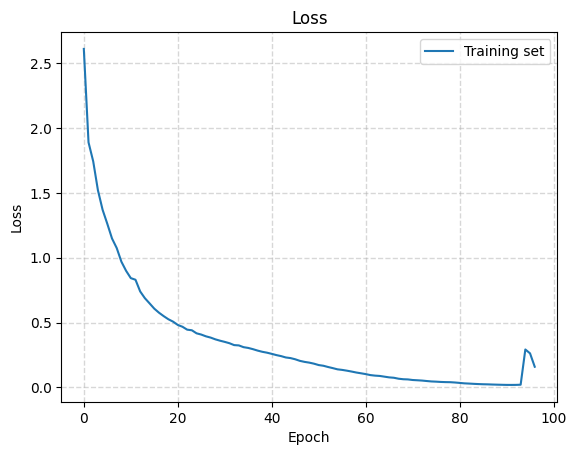

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

Observation: the model performance is getting better during training, which means it is able to predict charachters in which the final sequence looks like a genuine recipe.

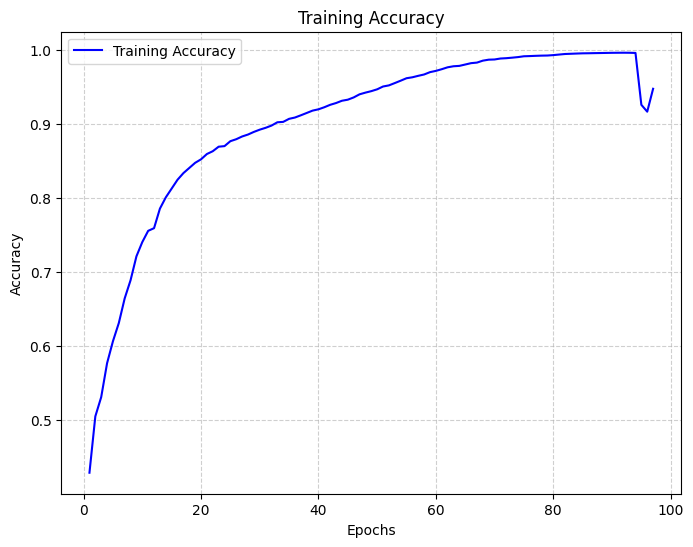

In [ ]:
import matplotlib.pyplot as plt

def plot_training_accuracy(history):
    acc = history.history['accuracy']  # Extract training accuracy
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.6)
    plt.show()

plot_training_accuracy(history)


Accuracy computes the proportion of correctly predicted tokens over the total tokens in the sequence for each batch.

In [ ]:
# Print the final training accuracy in percentage
final_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_accuracy * 100:.2f}%")


Final Training Accuracy: 94.81%




---



# Recipe Generation

Restore the latest checkpoint to run the model again. Since RNN only accepts fixed size batches once built we must rebuild it, change the batch size and run it again.



---



Restoring the model's weights from the checkpoint directory made earlier.

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints/ckpt_98'

In [ ]:
simplified_batch_size = 1
model_simplified = build_model(VOCABULARY_SIZE, 256, 1024, simplified_batch_size)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
model_simplified.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 256)            23296     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_1 (Dense)             (1, None, 91)             93275     
                                                                 
Total params: 5363547 (20.46 MB)
Trainable params: 5363547 (20.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_simplified.input_shape

(1, None)



---



To utilize the trained model for recipe generation, it must progress in the following loop:


*   Specify a starting string to feed into the RNN to set the length of characters to generate.
*   It predicts the next character (over a probability disitrbution) depending on the RNN state and starting string.
*  Sampling the next character so it won't always choose the highest probability
* the previous predicted character is the input, RNN state gets updated and fed back into the model to provide context. So, when the model predicts the next character it considers the context and not only one character.
* This process is repeated until enough characters are generated.


In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    #Specifying a starting delimeter
    padded_start_string = '📗 ' + start_string
    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))
    # Empty string list to store results.
    text_generated = []
    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)
        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()
        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]
        text_generated.append(next_character)
    return (padded_start_string + ''.join(text_generated))

The temprature parameter specifies a range of randomness until high confidence. Higher Tempratures are more random, while lower are more confident model predictions.

We tested across different tempratures to find the most optimal one. Further analysis on the results will be discuess in the report.

In [ ]:
def generate_combinations(model):
    recipe_length = 1000
    try_temperature = [1.0, 0.8, 0.7,0.4, 0.2]

    for temperature in try_temperature:
        generated_text = generate_text(
            model,
            start_string="Title: Chocolate Chip Cookies\nIngredients: 1 cup butter, 1 cup sugar, 2 cups flour, 1 tsp vanilla, 1 cup chocolate chips\nDirections:",
            num_generate=recipe_length,
            temperature=temperature
        )
        print(f'Attempt: {temperature}')
        print('-----------------------------------')
        print(generated_text)
        print('\n\n')

In [ ]:
generate_combinations(model_simplified)

Attempt: 1.0
-----------------------------------
📗 Title: Chocolate Chip Cookies
Ingredients: 1 cup butter, 1 cup sugar, 2 cups flour, 1 tsp vanilla, 1 cup chocolate chips
Directions: Geat muld, over persimmon pulp, and brown sugar together in a separate bowl until creamy and slightly thickened and plum mixture. Cover with tapizalach ary removing sids, star, for 20 minutes.
Meanwhile, mix flour, salt, balsamic vinegar, sugar and cinnamon in a small bowl; blend until smooth. Beat in eggs one at a time, beating yee swill to set. Stir in the blueberries, water, halves, cut sauce, dourn rice a gloss black into sligtened. ␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣␣

Resources used:


*   https://towardsdatascience.com/generating-cooking-recipes-using-tensorflow-and-lstm-recurrent-neural-network-a7bf242acad3
*   https://www.tensorflow.org/text/tutorials/text_generation

